# Data Preparation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from google.colab import drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# memasukkan data set yang akan diolah melalui github
url = "https://github.com/bysyifa/DSAI-datapreprocessing/raw/7729c70a269b6780a31eda12da1a268109aed9f7/train.csv"

# melakukan pengecekkan data pada tabel dan memunculkan 5 baris teratas dari tiap kolom
df = pd.read_csv(url)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# melakukan pengecekkan data pada tabel dan memunculkan 5 baris terakhir dari tiap kolom
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [ ]:
# mengecek informasi data set. dengan melakukan ini, maka informasi yang didapatkan berupa nama kolom, jumlah non-null tiap kolom, dan tipe data tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# memunculkan statistik deskriptif yang memberikan ringkasan data pada dataframe
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Missing Values

In [ ]:
# memilih beberapa kolom yang akan digunakan untuk mendapatkan insight baru
columns = ["SalePrice", "LotArea", "MiscVal", "BedroomAbvGr", "YearRemodAdd", "YearBuilt", "YrSold", "MoSold", "OverallQual", "OverallCond", "1stFlrSF", "2ndFlrSF"]

# membuat variabel baru yang akan digunakan
df1 = df[columns]
df1

,SalePrice,LotArea,MiscVal,BedroomAbvGr,YearRemodAdd,YearBuilt,YrSold,MoSold,OverallQual,OverallCond,1stFlrSF,2ndFlrSF
0,208500,8450,0,3,2003,2003,2008,2,7,5,856,854
1,181500,9600,0,3,1976,1976,2007,5,6,8,1262,0
2,223500,11250,0,3,2002,2001,2008,9,7,5,920,866
3,140000,9550,0,3,1970,1915,2006,2,7,5,961,756
4,250000,14260,0,4,2000,2000,2008,12,8,5,1145,1053
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,7917,0,3,2000,1999,2007,8,6,5,953,694
1456,210000,13175,0,3,1988,1978,2010,2,6,6,2073,0
1457,266500,9042,2500,4,2006,1941,2010,5,7,9,1188,1152
1458,142125,9717,0,2,1996,1950,2010,4,5,6,1078,0


In [ ]:
# mengecek missing value pada data
missing_values = df1.isnull().sum()

missing_values

SalePrice       0
LotArea         0
MiscVal         0
BedroomAbvGr    0
YearRemodAdd    0
YearBuilt       0
YrSold          0
MoSold          0
OverallQual     0
OverallCond     0
1stFlrSF        0
2ndFlrSF        0
dtype: int64

In [ ]:
# memfilter kembali dataframe untuk memunculkan kolom yang memiliki missing value
missval_col = missing_values[missing_values > 0].index

for col in missval_col:
    print(f"{missing_values[col]} missing value pada {col}")


> dilihat dari kolom-kolom yang dipilih, tidak ditemukan missing value. oleh karena itu tidak dilakukan tindakan lebih lanjut.

In [ ]:
# menghitung jumlah value pada seluruh kolom dataframe
total_cells = np.product(df.shape)
total_cells

118260

In [ ]:
# mengecek missing value secara keseluruhan dalam dataframe
missing_values1 = df.isnull().sum()

total_missing = missing_values1.sum()
total_missing

7829

> meski begitu, jika dilihat secara keseluruhan terdapat missing value pada kolom-kolom lainnya. namun tidak dilakukan tindakan lebih lanjut, karena kolom tersebut tidak berkaitan dengan kolom yang digunakan

## Duplicate Value

In [ ]:
# mengecek baris yang memiliki duplikat

duplicate_rows = df1[df1.duplicated()]
print("Baris yang memiliki duplikat:")
display(duplicate_rows)

Baris yang memiliki duplikat:


,SalePrice,LotArea,MiscVal,BedroomAbvGr,YearRemodAdd,YearBuilt,YrSold,MoSold,OverallQual,OverallCond,1stFlrSF,2ndFlrSF


> tidak ditemukan baris yang memiliki duplikat.

In [ ]:
# bila ditemukan baris yang memiliki duplikat dapat melakukan ini
df1 = df1.drop_duplicates()

df1

,SalePrice,LotArea,MiscVal,BedroomAbvGr,YearRemodAdd,YearBuilt,YrSold,MoSold,OverallQual,OverallCond,1stFlrSF,2ndFlrSF
0,208500,8450,0,3,2003,2003,2008,2,7,5,856,854
1,181500,9600,0,3,1976,1976,2007,5,6,8,1262,0
2,223500,11250,0,3,2002,2001,2008,9,7,5,920,866
3,140000,9550,0,3,1970,1915,2006,2,7,5,961,756
4,250000,14260,0,4,2000,2000,2008,12,8,5,1145,1053
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,7917,0,3,2000,1999,2007,8,6,5,953,694
1456,210000,13175,0,3,1988,1978,2010,2,6,6,2073,0
1457,266500,9042,2500,4,2006,1941,2010,5,7,9,1188,1152
1458,142125,9717,0,2,1996,1950,2010,4,5,6,1078,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   SalePrice     1460 non-null   int64
 1   LotArea       1460 non-null   int64
 2   MiscVal       1460 non-null   int64
 3   BedroomAbvGr  1460 non-null   int64
 4   YearRemodAdd  1460 non-null   int64
 5   YearBuilt     1460 non-null   int64
 6   YrSold        1460 non-null   int64
 7   MoSold        1460 non-null   int64
 8   OverallQual   1460 non-null   int64
 9   OverallCond   1460 non-null   int64
 10  1stFlrSF      1460 non-null   int64
 11  2ndFlrSF      1460 non-null   int64
dtypes: int64(12)
memory usage: 137.0 KB


> tidak ditemukan duplikat data dalam kolom-kolom yang dipilih

## Outlier

In [ ]:
# mengecek outlier pada data
numeric_cols = [col for col in df1.columns if df1[col].dtype != 'object']
iqr_cols = {}
for col in numeric_cols:
    q1 = np.percentile(df1[col], 25)
    q3 = np.percentile(df1[col], 75)
    iqr = q3 - q1
    iqr_cols[col] = iqr

lower_bound = {}
upper_bound = {}
for col, iqr in iqr_cols.items():
    lower_bound[col] = q1 - (1.5 * iqr)
    upper_bound[col] = q3 + (1.5 * iqr)

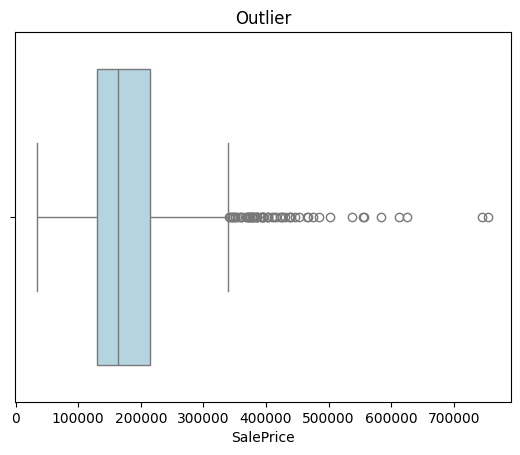

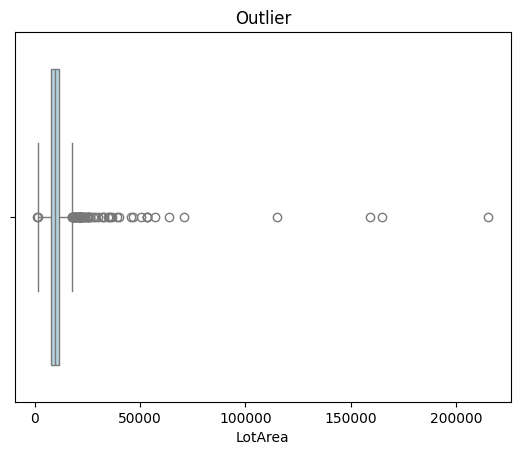

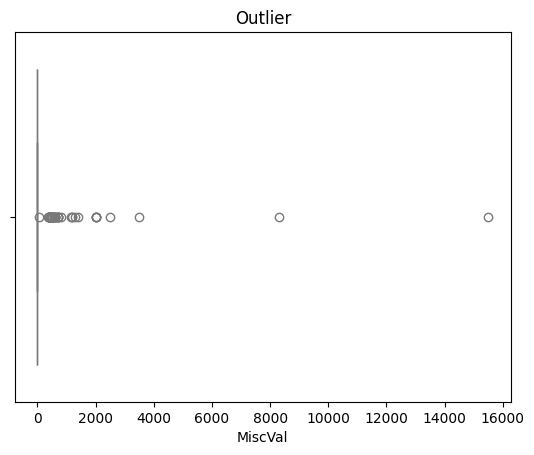

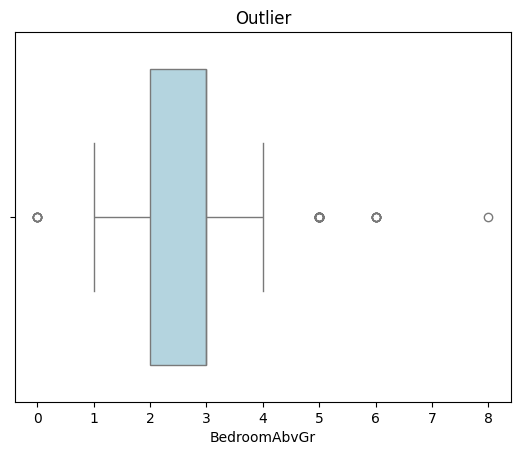

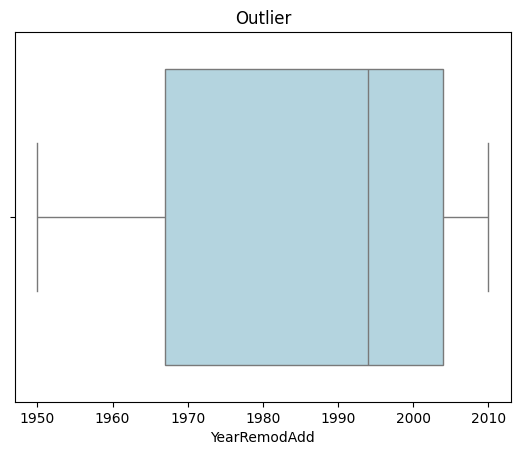

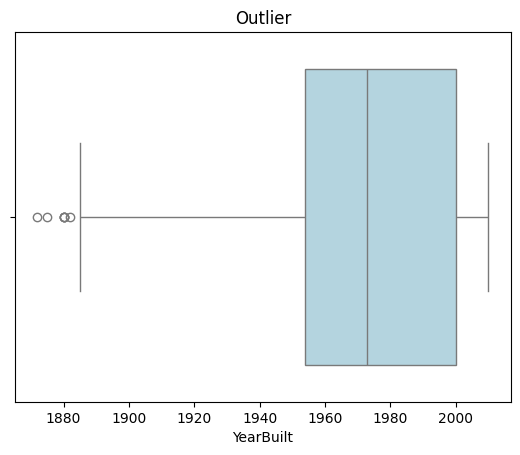

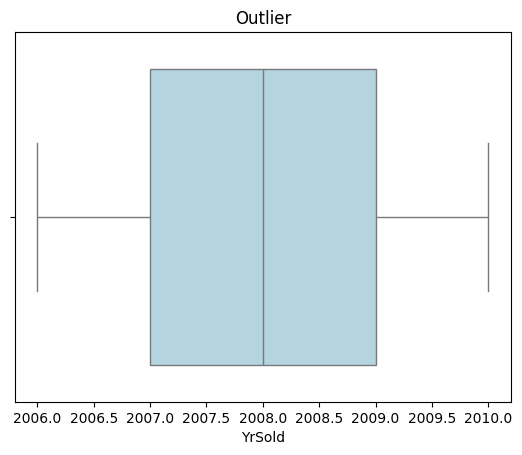

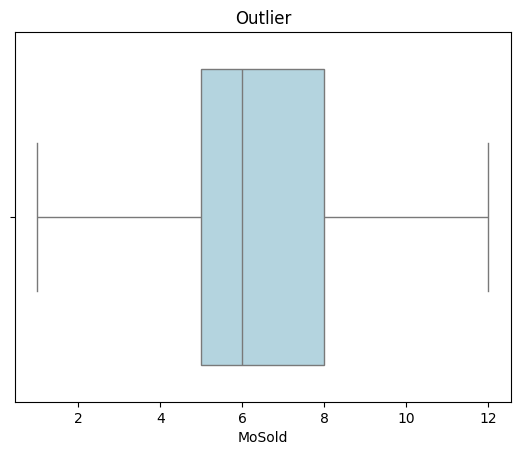

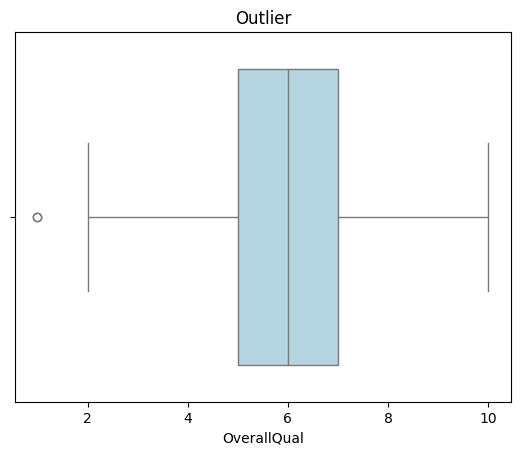

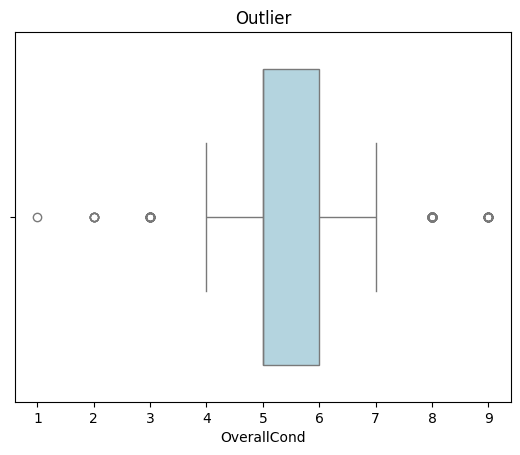

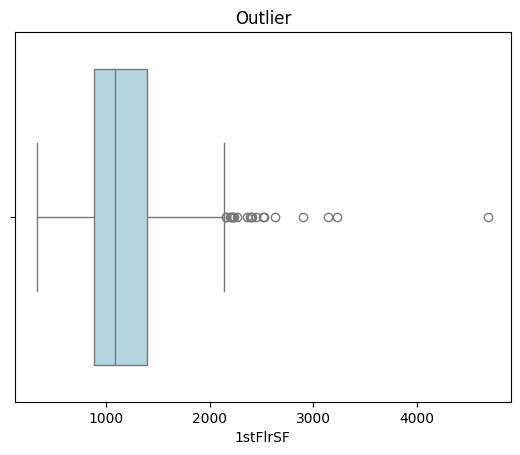

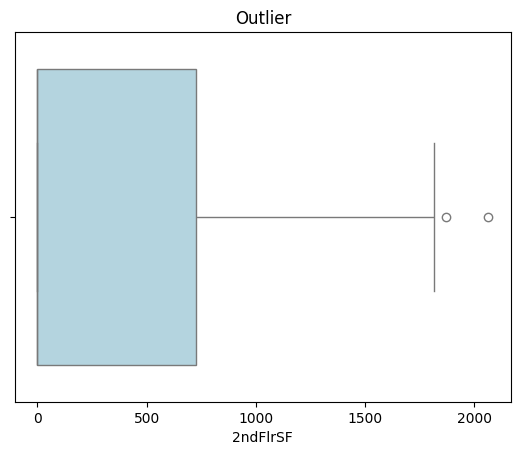

In [ ]:
# membuat visualisasi untuk menampilkan outlier

# dibuat visualisasi boxplot untuk masing-masing kolom
outliers = {}
for col in numeric_cols:
    outliers[col] = df1[col][(df1[col] < lower_bound[col]) | (df1[col] > upper_bound[col])]

for col in numeric_cols:
    sns.boxplot(x=df1[col], color='lightblue')
    plt.title(f"Outlier")
    plt.show()

> atau

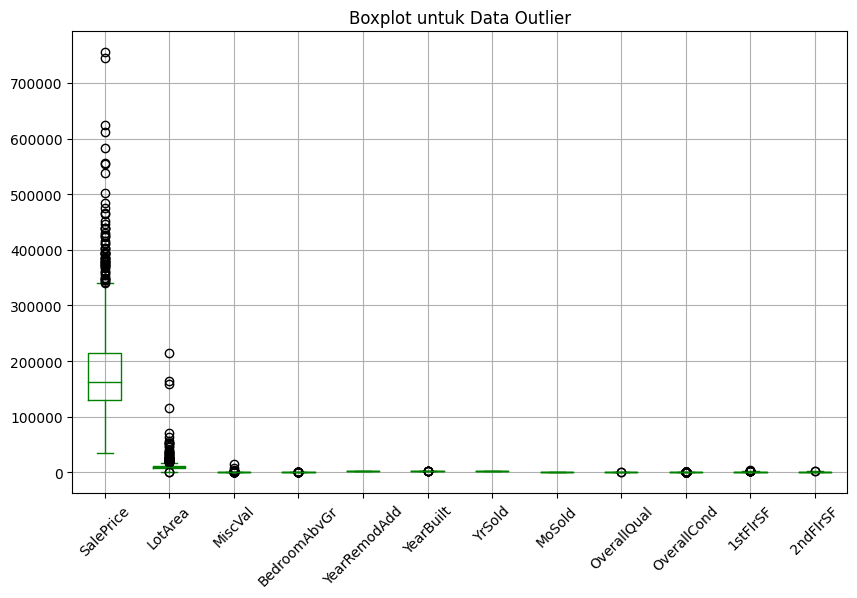

In [ ]:
# bila visualisasi seluruh kolom digabung, maka hasilnya seperti ini dan terlihat kurang baik karena perbedaan nilai antara satu kolom dan yang lainnya sangat tinggi
plt.figure(figsize=(10,6))
df1.boxplot(color='g')
plt.title('Boxplot untuk Data Outlier')
plt.xticks(rotation=45)
plt.show()

## Imbalance Data

In [ ]:
# mengecek imbalance pada data
num_cols = df1._get_numeric_data().columns.tolist()
num_cols.remove('MoSold')
cat_cols = df1.select_dtypes(include=['object']).columns.tolist()

print('Numeric Columns     : ', num_cols)
print('Categorical Columns : ', cat_cols)

Numeric Columns     :  ['SalePrice', 'LotArea', 'MiscVal', 'BedroomAbvGr', 'YearRemodAdd', 'YearBuilt', 'YrSold', 'OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF']
Categorical Columns :  []


In [ ]:
df1.MoSold.value_counts()

MoSold
6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: count, dtype: int64

In [ ]:
X = df1.drop(['MoSold'], axis = 1)
y = df1['MoSold']

X_train_imbalanced, X_test, y_train_imbalanced, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=10)
y_train_imbalanced.value_counts()

MoSold
6     177
7     164
5     143
4      99
8      86
3      74
10     62
11     55
9      44
12     41
1      41
2      36
Name: count, dtype: int64

In [ ]:
# Feature Scaling
X_train_imbalanced_num = X_train_imbalanced[num_cols].reset_index().drop(['index'], axis = 1)
X_train_imbalanced_cat = X_train_imbalanced[cat_cols].reset_index().drop(['index'], axis = 1)

# Numeric Scaling
sc = StandardScaler()
sc = sc.fit(X_train_imbalanced_num)
X_train_imbalanced_num = sc.transform(X_train_imbalanced_num)

# Ordinal Encoder
ore = OrdinalEncoder()
ore = ore.fit(X_train_imbalanced_cat)
X_train_imbalanced_cat = ore.transform(X_train_imbalanced_cat)

# Merge X_train
X_train_imbalanced_final = np.concatenate([X_train_imbalanced_num, X_train_imbalanced_cat], axis=1)

In [ ]:
# Train with Logistic Regression

lr_1 = LogisticRegression()
lr_1.fit(X_train_imbalanced_final, y_train_imbalanced)

LogisticRegression()

In [ ]:
# Feature Scaling

X_train_imbalanced_num = X_train_imbalanced[num_cols].reset_index().drop(['index'], axis = 1)
X_train_imbalanced_cat = X_train_imbalanced[cat_cols].reset_index().drop(['index'], axis = 1)

# Numeric Scaling
sc = StandardScaler()
sc = sc.fit(X_train_imbalanced_num)
X_train_imbalanced_num = sc.transform(X_train_imbalanced_num)

In [ ]:
# Merge with Categorical Column

X_train_imbalanced_new = pd.DataFrame(data=X_train_imbalanced_num, columns=num_cols)
X_train_imbalanced_new = pd.concat([X_train_imbalanced_new, X_train_imbalanced_cat], axis=1)
X_train_imbalanced_new

,SalePrice,LotArea,MiscVal,BedroomAbvGr,YearRemodAdd,YearBuilt,YrSold,OverallQual,OverallCond,1stFlrSF,2ndFlrSF
0,0.785669,-0.091406,-0.095208,0.196773,1.153467,1.219246,0.884083,1.349903,-0.542124,0.802277,-0.779365
1,-0.103452,-0.598784,-0.095208,-1.029458,1.056662,1.153958,-0.628106,0.634713,-0.542124,0.255491,-0.779365
2,-0.337756,-0.226231,-0.095208,-1.029458,-0.589023,-0.739418,-0.628106,-0.795666,0.330397,1.039218,-0.779365
3,3.957857,0.605102,-0.095208,-2.255689,1.153467,1.219246,0.884083,2.065093,-0.542124,2.796745,-0.779365
4,-0.047959,-0.759736,-0.095208,0.196773,0.717844,0.958091,-0.628106,-0.080476,-0.542124,-1.017741,0.971107
...,...,...,...,...,...,...,...,...,...,...,...
1017,0.698113,0.204015,-0.095208,1.423004,-0.734231,-0.021241,0.127989,-0.080476,1.202917,2.492107,-0.779365
1018,-0.442576,-0.620809,-0.095208,-1.029458,0.959857,1.121313,-1.384201,-0.795666,-0.542124,-0.228806,-0.779365
1019,-0.158945,0.315477,-0.095208,0.196773,0.088612,-0.478263,-1.384201,-0.795666,0.330397,0.721561,-0.779365
1020,-0.084954,0.113596,-0.095208,0.196773,0.959857,1.121313,0.884083,-0.080476,-0.542124,-1.239059,1.248959


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   SalePrice     1460 non-null   int64
 1   LotArea       1460 non-null   int64
 2   MiscVal       1460 non-null   int64
 3   BedroomAbvGr  1460 non-null   int64
 4   YearRemodAdd  1460 non-null   int64
 5   YearBuilt     1460 non-null   int64
 6   YrSold        1460 non-null   int64
 7   MoSold        1460 non-null   int64
 8   OverallQual   1460 non-null   int64
 9   OverallCond   1460 non-null   int64
 10  1stFlrSF      1460 non-null   int64
 11  2ndFlrSF      1460 non-null   int64
dtypes: int64(12)
memory usage: 137.0 KB


## Feature Encoding

> Tidak dilakukan encoding karena isi seluruh kolom yang dipilih berupa integer

# Exploratory Data Analysis

## Elaborasi Features dan Tipe Data

In [ ]:
# mengecek tipe data di setiap kolom
for col in df1.columns:
    if df1[col].dtype == 'object':
        print(f'{col} is nominal')
    elif df1[col].dtype == 'int64' or data[col].dtype == 'float64':
        print(f'{col} is numerical')
    else:
        print(f'{col} is ordinal')

SalePrice is numerical
LotArea is numerical
MiscVal is numerical
BedroomAbvGr is numerical
YearRemodAdd is numerical
YearBuilt is numerical
YrSold is numerical
MoSold is numerical
OverallQual is numerical
OverallCond is numerical
1stFlrSF is numerical
2ndFlrSF is numerical


> seluruh data pada setiap kolomnya memiliki tipe data numerikal



In [ ]:
# menjelaskan fitur setiap kolom beserta tipe datanya
fitur_definitions = {
  "SalePrice": {
    "definisi": "Harga jual rumah dalam USD ($)",
    "tipe_data": "numerik"
  },
  "LotArea": {
    "definisi": "Luas tanah dalam ft^2",
    "tipe_data": "numerik"
  },
  "MiscVal": {
    "definisi": "Nilai fitur lainnya dalam USD ($)",
    "tipe_data": "numerik"
  },
  "BedroomAbvGr": {
    "definisi": "Jumlah kamar tidur di atas tanah pada bangunan",
    "tipe_data": "numerik"
  },
  "YearRemodAdd": {
    "definisi": "Tahun dilakukannya renovasi terhadap rumah",
    "tipe_data": "numerik"
  },
  "YearBuilt": {
    "definisi": "Tahun dibangunnya rumah",
    "tipe_data": "numerik"
  },
  "YrSold": {
    "definisi": "Tahun dijualnya rumah",
    "tipe_data": "numerik"
  },
  "MoSold": {
    "definisi": "Bulan dijualnya rumah",
    "tipe_data": "numerik"
  },
  "OverallQual": {
    "definisi": "Kualitas rumah secara keseluruhan",
    "tipe_data": "numerik"
  },
  "OverallCond": {
    "definisi": "Kondisi rumah secara keseluruhan",
    "tipe_data": "numerik"
  },
  "1stFlrSF": {
    "definisi": "Luas Lantai 1",
    "tipe_data": "numerik"
  },
  "2ndFlrSF": {
    "definisi": "Luas lantai 2",
    "tipe_data": "numerik"
  }
}

for fitur, definisi in fitur_definitions.items():
  print(f"fitur: {fitur}")
  print(f"deskripsi: {definisi['definisi']}")
  print(f"tipe Data: {definisi['tipe_data']}")
  print("\n")


fitur: SalePrice
deskripsi: Harga jual rumah dalam USD ($)
tipe Data: numerik


fitur: LotArea
deskripsi: Luas tanah dalam ft^2
tipe Data: numerik


fitur: MiscVal
deskripsi: Nilai fitur lainnya dalam USD ($)
tipe Data: numerik


fitur: BedroomAbvGr
deskripsi: Jumlah kamar tidur di atas tanah pada bangunan
tipe Data: numerik


fitur: YearRemodAdd
deskripsi: Tahun dilakukannya renovasi terhadap rumah
tipe Data: numerik


fitur: YearBuilt
deskripsi: Tahun dibangunnya rumah
tipe Data: numerik


fitur: YrSold
deskripsi: Tahun dijualnya rumah
tipe Data: numerik


fitur: MoSold
deskripsi: Bulan dijualnya rumah
tipe Data: numerik


fitur: OverallQual
deskripsi: Kualitas rumah secara keseluruhan
tipe Data: numerik


fitur: OverallCond
deskripsi: Kondisi rumah secara keseluruhan
tipe Data: numerik


fitur: 1stFlrSF
deskripsi: Luas Lantai 1
tipe Data: numerik


fitur: 2ndFlrSF
deskripsi: Luas lantai 2
tipe Data: numerik




## Kondisi dan Perbedaan Menggunakan Mean, Median, Mode

> *   Mean atau nilai rata-rata dapat digunakan saat kurva berbentuk normal. ini karena mean merupakan pusat dari distribusi normal. selain itu, mean juga dapat digunakan untuk memprediksi kemana data baru akan masuk.
*   Median atau nilai tengah dapat digunakan saat didapati kurva berbentuk left/right skewed. ini dikarenakan median tidak terpengaruh oleh outlier dan lebih mudah diinterpretasikan.
*   Modus atau nilai yang paling banyak muncul dapat digunakan dalam segala bentuk kurva, baik kurva normal dan left/right skewed.




In [ ]:
# mengecek mean tiap kolom
df1.mean()

SalePrice       180921.195890
LotArea          10516.828082
MiscVal             43.489041
BedroomAbvGr         2.866438
YearRemodAdd      1984.865753
YearBuilt         1971.267808
YrSold            2007.815753
MoSold               6.321918
OverallQual          6.099315
OverallCond          5.575342
1stFlrSF          1162.626712
2ndFlrSF           346.992466
dtype: float64

In [ ]:
# mengecek median tiap kolom
df1.median()

SalePrice       163000.0
LotArea           9478.5
MiscVal              0.0
BedroomAbvGr         3.0
YearRemodAdd      1994.0
YearBuilt         1973.0
YrSold            2008.0
MoSold               6.0
OverallQual          6.0
OverallCond          5.0
1stFlrSF          1087.0
2ndFlrSF             0.0
dtype: float64

In [ ]:
# mengecek modus tiap kolom
df1.mode()

,SalePrice,LotArea,MiscVal,BedroomAbvGr,YearRemodAdd,YearBuilt,YrSold,MoSold,OverallQual,OverallCond,1stFlrSF,2ndFlrSF
0,140000,7200,0,3,1950,2006,2009,6,5,5,864,0


## Statistical Five Summaries

In [ ]:
# membuat lima ringkasan statistik tiap kolom yang meliputi nilai minimum, Q1, median, Q3, dan maksimum
minimum = df1.min()
q1 = df1.quantile(0.25)
median = df1.median()
q3 = df1.quantile(0.75)
maximum = df1.max()

print("\nMinimum:", minimum)
print("\nKuartil bawah (Q1):", q1)
print("\nMedian:", median)
print("\nKuartil atas (Q3):", q3)
print("\nMaksimum:", maximum)


Minimum: SalePrice       34900
LotArea          1300
MiscVal             0
BedroomAbvGr        0
YearRemodAdd     1950
YearBuilt        1872
YrSold           2006
MoSold              1
OverallQual         1
OverallCond         1
1stFlrSF          334
2ndFlrSF            0
dtype: int64

Kuartil bawah (Q1): SalePrice       129975.0
LotArea           7553.5
MiscVal              0.0
BedroomAbvGr         2.0
YearRemodAdd      1967.0
YearBuilt         1954.0
YrSold            2007.0
MoSold               5.0
OverallQual          5.0
OverallCond          5.0
1stFlrSF           882.0
2ndFlrSF             0.0
Name: 0.25, dtype: float64

Median: SalePrice       163000.0
LotArea           9478.5
MiscVal              0.0
BedroomAbvGr         3.0
YearRemodAdd      1994.0
YearBuilt         1973.0
YrSold            2008.0
MoSold               6.0
OverallQual          6.0
OverallCond          5.0
1stFlrSF          1087.0
2ndFlrSF             0.0
dtype: float64

Kuartil atas (Q3): SalePrice       21400

## Distribusi Data

In [ ]:
# mengecek distribusi data setiap kolom
df1.describe()

,SalePrice,LotArea,MiscVal,BedroomAbvGr,YearRemodAdd,YearBuilt,YrSold,MoSold,OverallQual,OverallCond,1stFlrSF,2ndFlrSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,10516.828082,43.489041,2.866438,1984.865753,1971.267808,2007.815753,6.321918,6.099315,5.575342,1162.626712,346.992466
std,79442.502883,9981.264932,496.123024,0.815778,20.645407,30.202904,1.328095,2.703626,1.382997,1.112799,386.587738,436.528436
min,34900.000000,1300.000000,0.000000,0.000000,1950.000000,1872.000000,2006.000000,1.000000,1.000000,1.000000,334.000000,0.000000
25%,129975.000000,7553.500000,0.000000,2.000000,1967.000000,1954.000000,2007.000000,5.000000,5.000000,5.000000,882.000000,0.000000
50%,163000.000000,9478.500000,0.000000,3.000000,1994.000000,1973.000000,2008.000000,6.000000,6.000000,5.000000,1087.000000,0.000000
75%,214000.000000,11601.500000,0.000000,3.000000,2004.000000,2000.000000,2009.000000,8.000000,7.000000,6.000000,1391.250000,728.000000
max,755000.000000,215245.000000,15500.000000,8.000000,2010.000000,2010.000000,2010.000000,12.000000,10.000000,9.000000,4692.000000,2065.000000


# Feature Engineering

> berikut ini merupakan 10 fitur/insight yang didapatkan dari dataset yang digunakan

In [ ]:
# membuat 10 fitur baru dari kolom yang telah dipilih dan diolah sebelumnya
NewCol = {
    "HargaAsli": df1["SalePrice"].astype("int") - df1["MiscVal"].astype("int"),
    "HargaPerFeet": df1["SalePrice"] / df1["LotArea"],
    "HargaPerMeter": df1["SalePrice"] / (df1["LotArea"] * 0.3048),
    "LuasBangunan": df1["1stFlrSF"] + df1["2ndFlrSF"],
    "JumlahKamarTidurDiLantai1": df1["BedroomAbvGr"],
    "UsiaAsliBangunan": df1["YrSold"].astype("int") - df1["YearBuilt"].astype("int"),
    "UsiaBangunanSaatRenov": df1["YearRemodAdd"].astype("int") - df1["YearBuilt"].astype("int"),
    "UsiaBangunanSaatTerjual": df1["YrSold"].astype("int") - df1["YearRemodAdd"].astype("int"),
    "BulanTerjual": df1["MoSold"].map({1: "Januari", 2: "Februari", 3: "Maret", 4: "April", 5: "Mei", 6: "Juni", 7: "Juli", 8: "Agustus", 9: "September", 10: "Oktober", 11: "November", 12: "Desember"}),
    "SkorKeseluruhanBangunan": (df1["OverallQual"] + df1["OverallCond"]) / 2
}

# menambahkan kolom baru dengan hasil perhitungan fitur yang baru dibuat
NewCol["LuasLahanTersisa"] = df1["LotArea"] - NewCol["LuasBangunan"]

df2 = pd.DataFrame(NewCol)

df2


,HargaAsli,HargaPerFeet,HargaPerMeter,LuasBangunan,JumlahKamarTidurDiLantai1,UsiaAsliBangunan,UsiaBangunanSaatRenov,UsiaBangunanSaatTerjual,BulanTerjual,SkorKeseluruhanBangunan,LuasLahanTersisa
0,208500,24.674556,80.953268,1710,3,5,0,5,Februari,6.0,6740
1,181500,18.906250,62.028379,1262,3,31,0,31,Mei,7.0,8338
2,223500,19.866667,65.179353,1786,3,7,1,6,September,6.0,9464
3,140000,14.659686,48.096082,1717,3,91,55,36,Februari,6.0,7833
4,250000,17.531557,57.518231,2198,4,8,0,8,Desember,6.5,12062
...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,22.104332,72.520776,1647,3,8,1,7,Agustus,5.5,6270
1456,210000,15.939279,52.294222,2073,3,32,10,22,Februari,6.0,11102
1457,264000,29.473568,96.698057,2340,4,69,65,4,Mei,8.0,6702
1458,142125,14.626428,47.986968,1078,2,60,46,14,April,5.5,8639


In [ ]:
# membuat 10 fitur baru dari kolom yang telah dipilih sebelumnya
NewCol = {
    "HargaAsli": df1["SalePrice"].astype("int") - df1["MiscVal"].astype("int"),
    "HargaPerFeet": df1["SalePrice"] / df1["LotArea"],
    "HargaPerMeter": df1["SalePrice"] / (df1["LotArea"] * 0.3048),
    "LuasBangunan": df1["1stFlrSF"] + df1["2ndFlrSF"],
    "LuasLahanTersisa": df1["LotArea"] - NewCol["LuasBangunan"],
    "JumlahKamarTidurDiLantai1": df1["BedroomAbvGr"],
    "UsiaAsliBangunan": df1["YrSold"].astype("int") - df1["YearBuilt"].astype("int"),
    "UsiaBangunanSaatRenov": df1["YearRemodAdd"].astype("int") - df1["YearBuilt"].astype("int"),
    "UsiaBangunanSaatTerjual": df1["YrSold"].astype("int") - df1["YearRemodAdd"].astype("int"),
    "BulanTerjual": df1["MoSold"].map({1: "Januari", 2: "Februari", 3: "Maret", 4: "April", 5: "Mei", 6: "Juni", 7: "Juli", 8: "Agustus", 9: "September", 10: "Oktober", 11: "November", 12: "Desember"}),
    "SkorKeseluruhanBangunan": (df1["OverallQual"] + df1["OverallCond"]) / 2
}

df2 = pd.DataFrame(NewCol)

df2


,HargaAsli,HargaPerFeet,HargaPerMeter,LuasBangunan,LuasLahanTersisa,JumlahKamarTidurDiLantai1,UsiaAsliBangunan,UsiaBangunanSaatRenov,UsiaBangunanSaatTerjual,BulanTerjual,SkorKeseluruhanBangunan
0,208500,24.674556,80.953268,1710,6740,3,5,0,5,Februari,6.0
1,181500,18.906250,62.028379,1262,8338,3,31,0,31,Mei,7.0
2,223500,19.866667,65.179353,1786,9464,3,7,1,6,September,6.0
3,140000,14.659686,48.096082,1717,7833,3,91,55,36,Februari,6.0
4,250000,17.531557,57.518231,2198,12062,4,8,0,8,Desember,6.5
...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,22.104332,72.520776,1647,6270,3,8,1,7,Agustus,5.5
1456,210000,15.939279,52.294222,2073,11102,3,32,10,22,Februari,6.0
1457,264000,29.473568,96.698057,2340,6702,4,69,65,4,Mei,8.0
1458,142125,14.626428,47.986968,1078,8639,2,60,46,14,April,5.5


In [ ]:
# menggabungkan data frame yang telah diolah dengan data frame yang berisi fitur baru
df3 = pd.concat([df1, df2], axis=1, join='outer')
df3

,SalePrice,LotArea,MiscVal,BedroomAbvGr,YearRemodAdd,YearBuilt,YrSold,MoSold,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,HargaAsli,HargaPerFeet,HargaPerMeter,LuasBangunan,LuasLahanTersisa,JumlahKamarTidurDiLantai1,UsiaAsliBangunan,UsiaBangunanSaatRenov,UsiaBangunanSaatTerjual,BulanTerjual,SkorKeseluruhanBangunan
0,208500,8450,0,3,2003,2003,2008,2,7,5,856,854,208500,24.674556,80.953268,1710,6740,3,5,0,5,Februari,6.0
1,181500,9600,0,3,1976,1976,2007,5,6,8,1262,0,181500,18.906250,62.028379,1262,8338,3,31,0,31,Mei,7.0
2,223500,11250,0,3,2002,2001,2008,9,7,5,920,866,223500,19.866667,65.179353,1786,9464,3,7,1,6,September,6.0
3,140000,9550,0,3,1970,1915,2006,2,7,5,961,756,140000,14.659686,48.096082,1717,7833,3,91,55,36,Februari,6.0
4,250000,14260,0,4,2000,2000,2008,12,8,5,1145,1053,250000,17.531557,57.518231,2198,12062,4,8,0,8,Desember,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,7917,0,3,2000,1999,2007,8,6,5,953,694,175000,22.104332,72.520776,1647,6270,3,8,1,7,Agustus,5.5
1456,210000,13175,0,3,1988,1978,2010,2,6,6,2073,0,210000,15.939279,52.294222,2073,11102,3,32,10,22,Februari,6.0
1457,266500,9042,2500,4,2006,1941,2010,5,7,9,1188,1152,264000,29.473568,96.698057,2340,6702,4,69,65,4,Mei,8.0
1458,142125,9717,0,2,1996,1950,2010,4,5,6,1078,0,142125,14.626428,47.986968,1078,8639,2,60,46,14,April,5.5


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SalePrice                  1460 non-null   int64  
 1   LotArea                    1460 non-null   int64  
 2   MiscVal                    1460 non-null   int64  
 3   BedroomAbvGr               1460 non-null   int64  
 4   YearRemodAdd               1460 non-null   int64  
 5   YearBuilt                  1460 non-null   int64  
 6   YrSold                     1460 non-null   int64  
 7   MoSold                     1460 non-null   int64  
 8   OverallQual                1460 non-null   int64  
 9   OverallCond                1460 non-null   int64  
 10  1stFlrSF                   1460 non-null   int64  
 11  2ndFlrSF                   1460 non-null   int64  
 12  HargaAsli                  1460 non-null   int64  
 13  HargaPerFeet               1460 non-null   float

In [ ]:
df3.describe()

,SalePrice,LotArea,MiscVal,BedroomAbvGr,YearRemodAdd,YearBuilt,YrSold,MoSold,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,HargaAsli,HargaPerFeet,HargaPerMeter,LuasBangunan,LuasLahanTersisa,JumlahKamarTidurDiLantai1,UsiaAsliBangunan,UsiaBangunanSaatRenov,UsiaBangunanSaatTerjual,SkorKeseluruhanBangunan
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,10516.828082,43.489041,2.866438,1984.865753,1971.267808,2007.815753,6.321918,6.099315,5.575342,1162.626712,346.992466,180877.706849,21.069878,69.126898,1509.619178,9007.208904,2.866438,36.547945,13.597945,22.950000,5.837329
std,79442.502883,9981.264932,496.123024,0.815778,20.645407,30.202904,1.328095,2.703626,1.382997,1.112799,386.587738,436.528436,79454.563764,12.387559,40.641596,521.163523,9856.055638,0.815778,30.250152,24.476465,20.640653,0.846764
min,34900.000000,1300.000000,0.000000,0.000000,1950.000000,1872.000000,2006.000000,1.000000,1.000000,1.000000,334.000000,0.000000,34900.000000,1.390441,4.561814,334.000000,71.000000,0.000000,0.000000,0.000000,-1.000000,1.000000
25%,129975.000000,7553.500000,0.000000,2.000000,1967.000000,1954.000000,2007.000000,5.000000,5.000000,5.000000,882.000000,0.000000,129900.000000,13.775136,45.194014,1123.750000,6277.250000,2.000000,8.000000,0.000000,4.000000,5.500000
50%,163000.000000,9478.500000,0.000000,3.000000,1994.000000,1973.000000,2008.000000,6.000000,6.000000,5.000000,1087.000000,0.000000,162950.000000,17.856628,58.584739,1458.000000,7967.000000,3.000000,35.000000,0.000000,14.000000,6.000000
75%,214000.000000,11601.500000,0.000000,3.000000,2004.000000,2000.000000,2009.000000,8.000000,7.000000,6.000000,1391.250000,728.000000,214000.000000,23.769031,77.982385,1775.250000,9863.000000,3.000000,54.000000,20.000000,41.000000,6.500000
max,755000.000000,215245.000000,15500.000000,8.000000,2010.000000,2010.000000,2010.000000,12.000000,10.000000,9.000000,4692.000000,2065.000000,755000.000000,95.384615,312.941652,5642.000000,213209.000000,8.000000,136.000000,123.000000,60.000000,9.500000


# Machine Learning

> machine learning model yang akan digunakan adalah linear regression yang merupakan suprevised learning. supervised learning merupakan model yang dibuat dengan data train yang telah diberikan label. tujuan digunakan model ini untuk dapat membuat prediksi atau mengambil keputusan otomatis, tanpa perlu dilakukan pemrograman secara manual untuk melakukan tugasnya.

In [ ]:
# menampilkan kolom secara keseluruhan
pd.set_option('display.max_columns', None)

In [ ]:
# membuat variabel baru untuk memanggil data yang akan digunakan
df_cp = df3
df_cp

,SalePrice,LotArea,MiscVal,BedroomAbvGr,YearRemodAdd,YearBuilt,YrSold,MoSold,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,HargaAsli,HargaPerFeet,HargaPerMeter,LuasBangunan,LuasLahanTersisa,JumlahKamarTidurDiLantai1,UsiaAsliBangunan,UsiaBangunanSaatRenov,UsiaBangunanSaatTerjual,BulanTerjual,SkorKeseluruhanBangunan
0,208500,8450,0,3,2003,2003,2008,2,7,5,856,854,208500,24.674556,80.953268,1710,6740,3,5,0,5,Februari,6.0
1,181500,9600,0,3,1976,1976,2007,5,6,8,1262,0,181500,18.906250,62.028379,1262,8338,3,31,0,31,Mei,7.0
2,223500,11250,0,3,2002,2001,2008,9,7,5,920,866,223500,19.866667,65.179353,1786,9464,3,7,1,6,September,6.0
3,140000,9550,0,3,1970,1915,2006,2,7,5,961,756,140000,14.659686,48.096082,1717,7833,3,91,55,36,Februari,6.0
4,250000,14260,0,4,2000,2000,2008,12,8,5,1145,1053,250000,17.531557,57.518231,2198,12062,4,8,0,8,Desember,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,7917,0,3,2000,1999,2007,8,6,5,953,694,175000,22.104332,72.520776,1647,6270,3,8,1,7,Agustus,5.5
1456,210000,13175,0,3,1988,1978,2010,2,6,6,2073,0,210000,15.939279,52.294222,2073,11102,3,32,10,22,Februari,6.0
1457,266500,9042,2500,4,2006,1941,2010,5,7,9,1188,1152,264000,29.473568,96.698057,2340,6702,4,69,65,4,Mei,8.0
1458,142125,9717,0,2,1996,1950,2010,4,5,6,1078,0,142125,14.626428,47.986968,1078,8639,2,60,46,14,April,5.5


In [ ]:
# drop kolom yang tidak begitu relevan
df_cp.drop(['BulanTerjual'], axis=1, inplace=True)

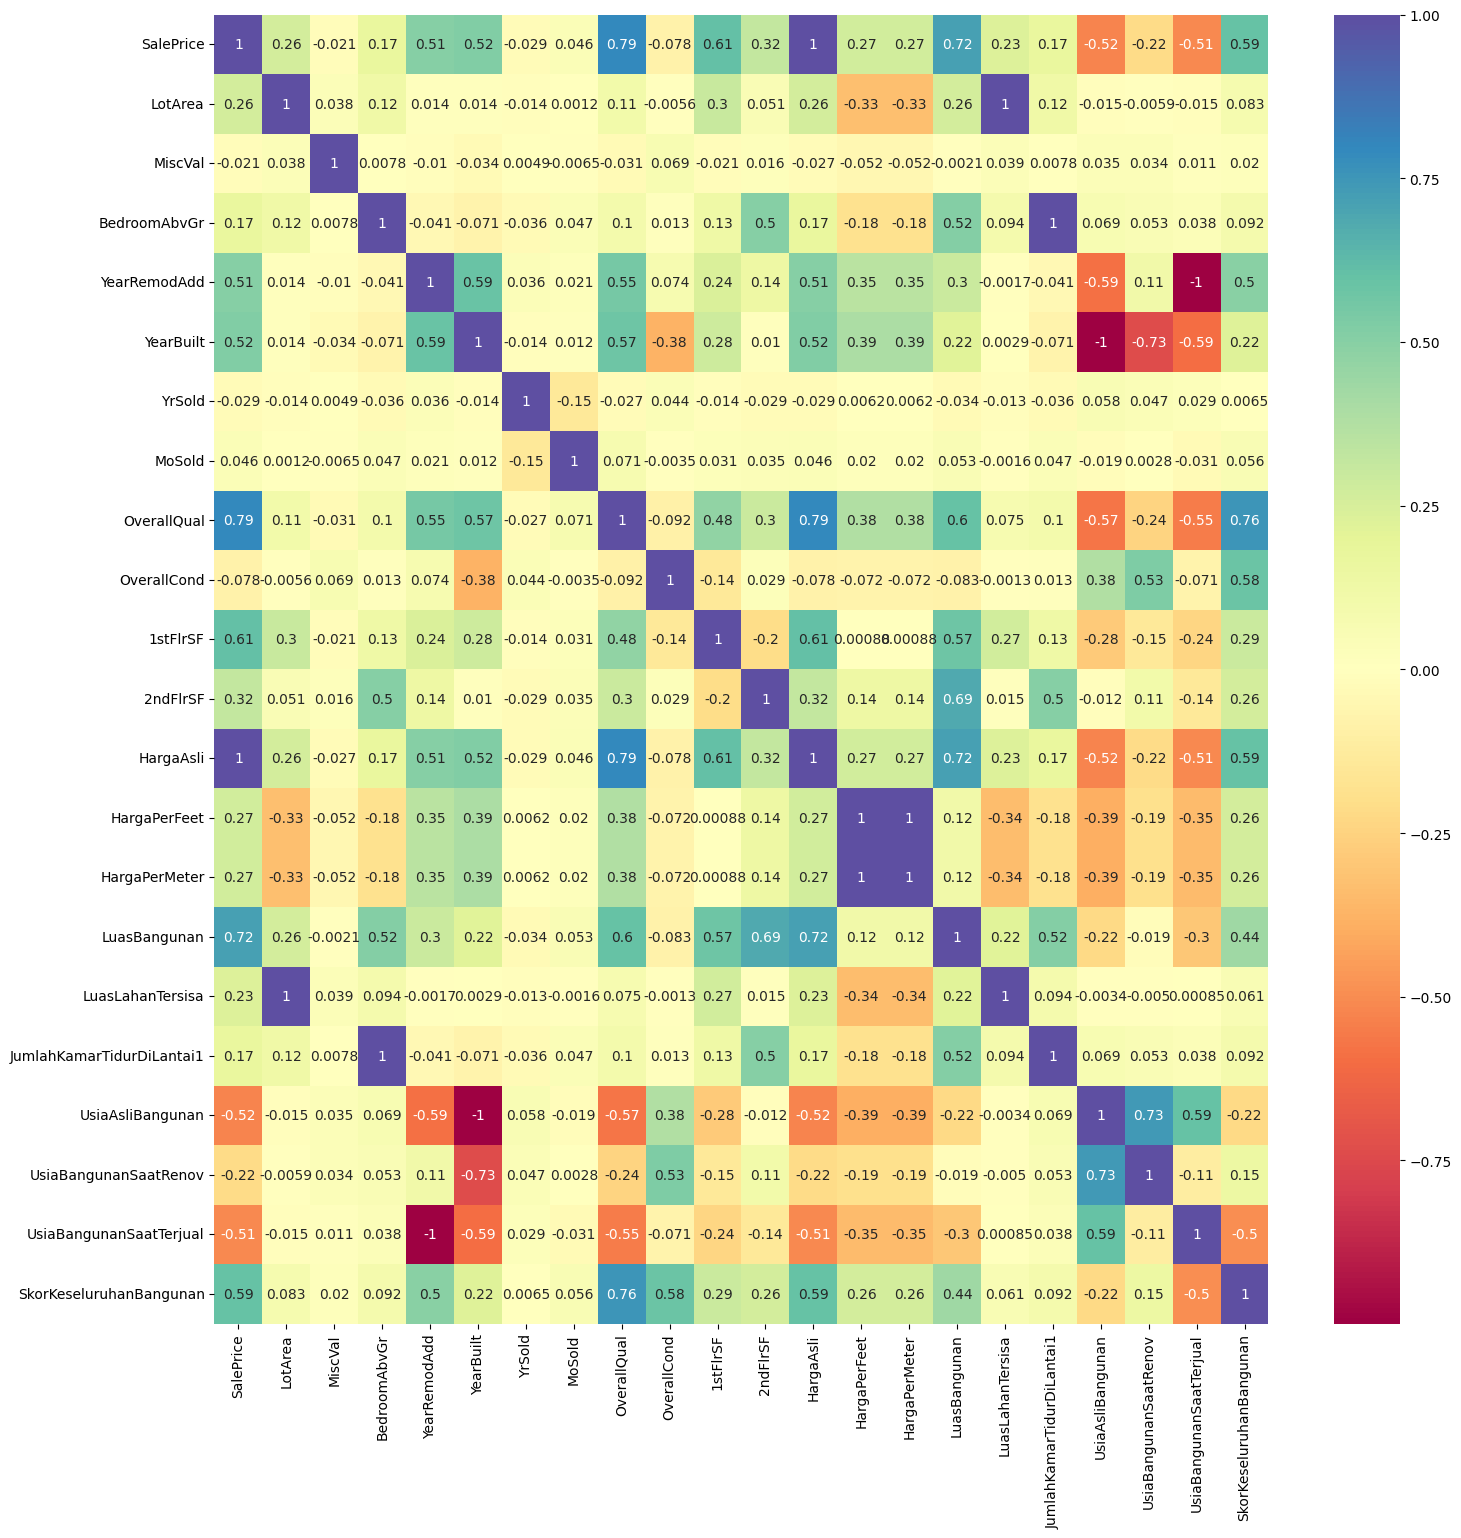

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat heatmap
plt.figure(figsize=(17,17))
sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(df_cp.corr(), annot=True, cmap='Spectral')

# Menampilkan plot
plt.show()


In [ ]:
# mengecek kembali setelah drop kolom
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SalePrice                  1460 non-null   int64  
 1   LotArea                    1460 non-null   int64  
 2   MiscVal                    1460 non-null   int64  
 3   BedroomAbvGr               1460 non-null   int64  
 4   YearRemodAdd               1460 non-null   int64  
 5   YearBuilt                  1460 non-null   int64  
 6   YrSold                     1460 non-null   int64  
 7   MoSold                     1460 non-null   int64  
 8   OverallQual                1460 non-null   int64  
 9   OverallCond                1460 non-null   int64  
 10  1stFlrSF                   1460 non-null   int64  
 11  2ndFlrSF                   1460 non-null   int64  
 12  HargaAsli                  1460 non-null   int64  
 13  HargaPerFeet               1460 non-null   float

## Feature Selection

In [ ]:
# impor library
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline

In [ ]:
# menentukan kolom yang akan digunakan dan drop seluruh kolom yang tidak ingin digunakan
wtu =['SalePrice', 'OverallQual', 'LuasBangunan', '1stFlrSF']
df_cleaned = df_cp[wtu]
df_cleaned

,SalePrice,OverallQual,LuasBangunan,1stFlrSF
0,208500,7,1710,856
1,181500,6,1262,1262
2,223500,7,1786,920
3,140000,7,1717,961
4,250000,8,2198,1145
...,...,...,...,...
1455,175000,6,1647,953
1456,210000,6,2073,2073
1457,266500,7,2340,1188
1458,142125,5,1078,1078


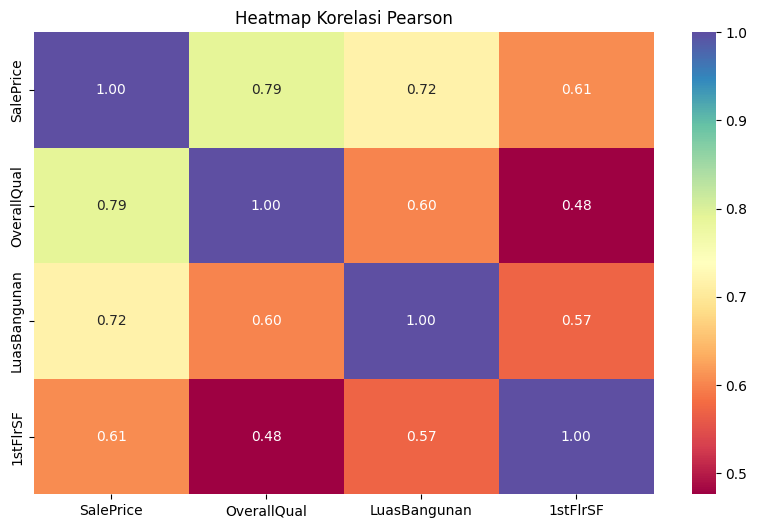

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# menghitung koefisien korelasi Pearson
correlation_matrix = df_cleaned.corr()

# set ukuran heatmap
plt.figure(figsize=(10, 6))

# membuat heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="Spectral", fmt=".2f")

# menampilkan plot
plt.title("Heatmap Korelasi Pearson")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# melakukan split data
X = df_cleaned.drop(columns=["SalePrice"])
y = df_cleaned["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


In [ ]:
# jumlah data dalam setiap bagian
print(f"Jumlah Data Pelatihan: {len(X_train)}") # 80% data train
print(f"Jumlah Data Pengujian: {len(X_test)}") # 20% data test

Jumlah Data Pelatihan: 1168
Jumlah Data Pengujian: 292


In [ ]:
# melakukan preprocessing
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# model training
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# memprediksi model
y_pred = model.predict(X_test)

In [ ]:
# mengevaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 1279443552.82


## Hyperparameter Tuning

> hyperparameter tuning dilakukan untuk membantu mengoptimalkan data train dan problem yang didapatkan. hal ini akan mempengaruhi kinerja model untuk mengolah data serta membuat kinerjanya semakin efisien

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# menyiapkan data
data = df_cleaned

In [ ]:
# memilih fitur dan target
X = data[['OverallQual']]
y = data["SalePrice"]

In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# menentukan model
model = LinearRegression()

In [ ]:
# mendefinisikan hyperparameter yang ingin diuji
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

In [ ]:
# membuat objek Grid Search dengan model dan hyperparameter yang telah didefinisikan
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

In [ ]:
# melakukan hyperparameter tuning pada data train
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [ ]:
# memunculkan hasil terbaik
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Hyperparameter terbaik:", best_params)
print("Skor terbaik (MSE):", best_score)


Hyperparameter terbaik: {'fit_intercept': True, 'positive': True}
Skor terbaik (MSE): 2294266486.648763


# Cross Validation

In [ ]:
# impor library yang akan digunakan
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression

# menyiapkan data target
X = df_cleaned.drop('SalePrice', axis=1)
y = df_cleaned['SalePrice']

# menentukan model
clf = LinearRegression()

# melakukan cross validation
cv_score = cross_val_score(clf, X, y, cv=10)
print('Cross Validation Score')
print(cv_score)

# memunculkan prediksi cross validation
y_pred = cross_val_predict(clf, X, y, cv=3)


Cross Validation Score
[0.75106697 0.7926292  0.82496561 0.6800135  0.76654119 0.75516706
 0.74369105 0.71813757 0.56763408 0.77907948]


# Learning Curves

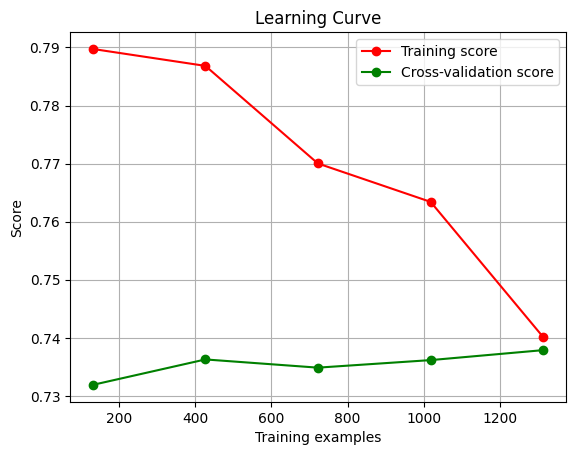

In [ ]:
from sklearn.model_selection import learning_curve, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# menyiapkan data target
X = df_cleaned.drop('SalePrice', axis=1)
y = df_cleaned['SalePrice']

# menentukan model
clf = LinearRegression()

# menghitung learning curve
train_sizes, train_scores, test_scores = learning_curve(clf, X, y, cv=10)

# menghitung skor mean
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# membuat visualisasi learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")

# menampilkan plot
plt.show()


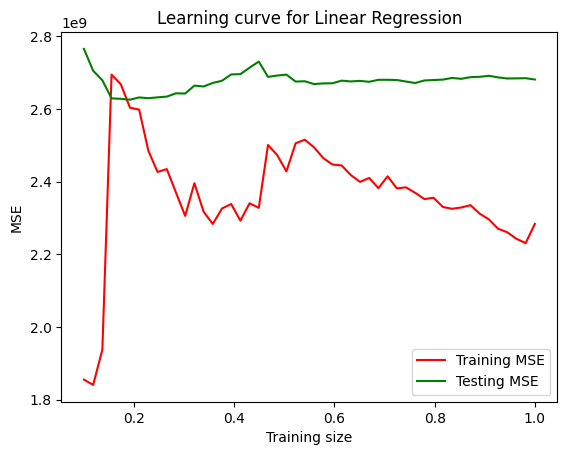

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# menyiapkan data
data = df_cleaned
X = data[['OverallQual']]
y = data['SalePrice']

# split data untuk train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# looping
train_sizes = np.linspace(0.1, 1, 50)
learning_curve_train = []
learning_curve_test = []

# menentukan model
classifier = LinearRegression()

for i in train_sizes:
# fit model ke data training
    classifier.fit(X_train[:int(len(X_train)*i)], y_train[:int(len(y_train)*i)])

# melakukan prediksi pada data training dan testing
    train_predictions = classifier.predict(X_train[:int(len(X_train)*i)])
    test_predictions = classifier.predict(X_test)

# menghitung MSE untuk data training dan testing
    train_mse = mean_squared_error(y_train[:int(len(y_train)*i)], train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)

# menambahkan MSE ke learning curve
    learning_curve_train.append(train_mse)
    learning_curve_test.append(test_mse)

# membuat visualisasi learning curve
plt.plot(train_sizes, learning_curve_train, color='r', label='Training MSE')
plt.plot(train_sizes, learning_curve_test, color='g', label='Testing MSE')
plt.xlabel('Training size')
plt.ylabel('MSE')
plt.title('Learning curve for Linear Regression')
plt.legend()

# memunculkan plot
plt.show()



> saat menggunakan metric evaluation MSE, hasil yang muncul pada grafik dapat dikatakan **underfit**. hal ini dikarenakan grafik data test-nya cukup tinggi dan stabil, sedangkan grafik data train-nya cenderung naik turun cukup drastis dan masih lebih rendah dari data test.



In [ ]:
from sklearn.metrics import r2_score

# melakukan prediksi pada data training dan testing
train_predictions = classifier.predict(X_train)
test_predictions = classifier.predict(X_test)

# menghitung R-squared untuk data training dan testing
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f"R-squared for training data: {train_r2}")
print(f"R-squared for testing data: {test_r2}")


R-squared for training data: 0.6170962665508342
R-squared for testing data: 0.6504677778896863


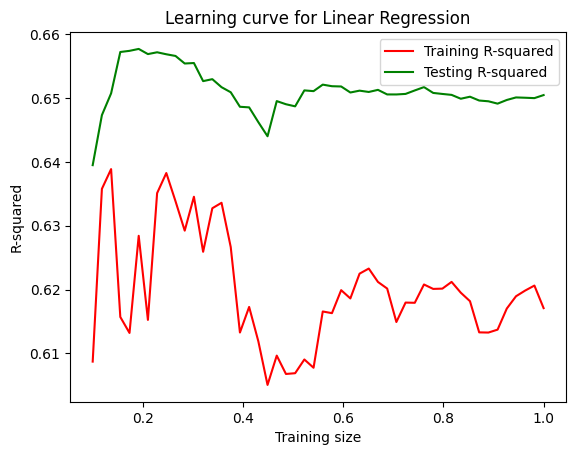

In [ ]:
# learning curve menggunakan r squared
from sklearn.metrics import r2_score

# looping
train_sizes = np.linspace(0.1, 1, 50)
learning_curve_train = []
learning_curve_test = []

clsf = LinearRegression()

for i in train_sizes:
# fit model ke data training
    clsf.fit(X_train[:int(len(X_train)*i)], y_train[:int(len(y_train)*i)])

# melakukan prediksi pada data training dan testing
    train_predictions = clsf.predict(X_train[:int(len(X_train)*i)])
    test_predictions = clsf.predict(X_test)

# menghitung R-squared untuk data training dan testing
    train_r2 = r2_score(y_train[:int(len(y_train)*i)], train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

# menambahkan R-squared ke learning curve
    learning_curve_train.append(train_r2)
    learning_curve_test.append(test_r2)

# membuat visualisasi learning curve
plt.plot(train_sizes, learning_curve_train, color='r', label='Training R-squared')
plt.plot(train_sizes, learning_curve_test, color='g', label='Testing R-squared')
plt.xlabel('Training size')
plt.ylabel('R-squared')
plt.title('Learning curve for Linear Regression')
plt.legend()

# memunculkan plot
plt.show()




> selanjutnya dilakukan metric evaluation menggunakan R-squared. hasil yang muncul pada grafik masih naik turun. meski begitu, dapat dikatakan bahwa hasilnya lebih baik daripada penggunaan MSE sebelumnya. perbedaan skor antara data test dan data train-nya tidak terlalu besar, dengan selisih sebesar 0.03337151123813443. sehingga, dapat dikatakan bahwa ini merupakan goodfit.

